In [ ]:
#pytorch tutorials
#https://pytorch.org/tutorials/intermediate/char_rnn_generation_tutorial.html
#conda env base

In [1]:
#https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial
import torch
import os
import unicodedata2
import string

list_files = os.listdir(os.getcwd()+'/data/names')
all_letters = string.ascii_letters + " .,;'" #is the punc necessary?


def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata2.normalize('NFD', s)
        if unicodedata2.category(c) != 'Mn'
        and c in all_letters
    )
print(unicodeToAscii('Ślusàrski'))

def read_lines(filename):
    print("filenamne",filename)
    print(os.getcwd()+'/data/names/'+filename)
    lines = open(os.getcwd()+'/data/names/'+filename).read().strip().split('\n')
    return lines

    
#for filename in list_files:
#    stuff = read_lines(filename)
print("list_files:",list_files)
category_lines = [read_lines(filename) for filename in list_files if filename.endswith('.txt')]
print(len(category_lines)) #18
#spot check 5th Vietnamese.txt
print(category_lines[5])
category_dict = dict(zip(list_files, category_lines))
print(category_dict['Vietnamese.txt'])





Slusarski
list_files: ['Czech.txt', 'German.txt', 'Arabic.txt', 'Japanese.txt', 'Chinese.txt', 'Vietnamese.txt', 'Russian.txt', 'French.txt', 'Irish.txt', 'English.txt', 'Spanish.txt', 'Greek.txt', 'Italian.txt', 'Portuguese.txt', 'Scottish.txt', 'Dutch.txt', 'Korean.txt', 'Polish.txt']
filenamne Czech.txt
/Users/dc/meetup_cs224n/rnn/data/names/Czech.txt
filenamne German.txt
/Users/dc/meetup_cs224n/rnn/data/names/German.txt
filenamne Arabic.txt
/Users/dc/meetup_cs224n/rnn/data/names/Arabic.txt
filenamne Japanese.txt
/Users/dc/meetup_cs224n/rnn/data/names/Japanese.txt
filenamne Chinese.txt
/Users/dc/meetup_cs224n/rnn/data/names/Chinese.txt
filenamne Vietnamese.txt
/Users/dc/meetup_cs224n/rnn/data/names/Vietnamese.txt
filenamne Russian.txt
/Users/dc/meetup_cs224n/rnn/data/names/Russian.txt
filenamne French.txt
/Users/dc/meetup_cs224n/rnn/data/names/French.txt
filenamne Irish.txt
/Users/dc/meetup_cs224n/rnn/data/names/Irish.txt
filenamne English.txt
/Users/dc/meetup_cs224n/rnn/data/names/

In [22]:
# onehot
def letter_to_tensor(letter):
    #print("letter:",letter)
    idx = all_letters.find(letter)
    tnsr = torch.zeros(len(all_letters))
    tnsr[idx] = 1
    return tnsr

def name_to_tensor(name):
    print("name:",name)
    return [onehot_letter(letter) for letter in name]

#test = onehot('j')
#print(test)
print("name_to_tensor Nguyen:",name_to_tensor('Nguyen'))

a=[1,2,3,4]
print(*a, sep='\n')

print("-"*10)
#this is best because it doesnt require the list comprehension
#map applies fn str to each element. this looks more like a data pipeline
print('\n'.join(map(str,a)))


def onehot_lines(lines):
    names = [x for x in lines]
    print("names:",names)
    on = [name_to_tensor(name) for name in names]
    print("on:", on)
    #print("onehot_lines:",onehot_lines)
#print(onehot_lines(category_dict['Vietnamese.txt']))

name: Nguyen
name_to_tensor Nguyen: [tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.]), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0

In [ ]:
def letter_tensor(letter):
    """"""
    
def name_tensor(name):
    """"""
    


In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN,self).__init__(self)
        
        self.hidden_size = hidden_size
        
        self.input = nn.Linear(input_size, self.hidden_size)
        self.hidden = nn.Linear(self.hidden_size, self.hidden_size)
        self.output = nn.Linear(self.hidden_size, output_size)
        self.softmax  = nn.LogSoftmax(dim=1)
    
    def forward(self,input, hidden):
        hidden = F.tanh(self.input(input+self.hidden(hidden)))
        output = self.output(hidden)
        output = self.softmax(output)
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)
n_hidden=128
rnn = RNN(n_letters, n_hidden, n_categories)
        

In [26]:
from io import open
import glob
import os

def findFiles(path): return glob.glob(path)

print(findFiles('data/names/*.txt'))

import unicodedata
import string

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
print("n_letters:",n_letters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

print(unicodeToAscii('Ślusàrski'))

# Build the category_lines dictionary, a list of names per language
category_lines = {}
all_categories = []

# Read a file and split into lines
def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return [unicodeToAscii(line) for line in lines]

for filename in findFiles('data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

n_categories = len(all_categories)

['data/names/Czech.txt', 'data/names/German.txt', 'data/names/Arabic.txt', 'data/names/Japanese.txt', 'data/names/Chinese.txt', 'data/names/Vietnamese.txt', 'data/names/Russian.txt', 'data/names/French.txt', 'data/names/Irish.txt', 'data/names/English.txt', 'data/names/Spanish.txt', 'data/names/Greek.txt', 'data/names/Italian.txt', 'data/names/Portuguese.txt', 'data/names/Scottish.txt', 'data/names/Dutch.txt', 'data/names/Korean.txt', 'data/names/Polish.txt']
n_letters: 57
Slusarski


In [14]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [38]:
import torch

# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return all_letters.find(letter)

# Just for demonstration, turn a letter into a <1 x n_letters> Tensor
def letterToTensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][letterToIndex(letter)] = 1
    return tensor

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

#print(letterToTensor('J'))

print(lineToTensor('Nguyen').size())
print(lineToTensor('Nguyen'))


torch.Size([6, 1, 57])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        

In [34]:
from torch import nn
import torch.nn.functional as F

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(input_size, hidden_size)
        self.h2h = nn.Linear(hidden_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input, hidden):
        hidden = F.tanh(self.i2h(input) + self.h2h(hidden))
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

n_hidden = 128
rnn = RNN(n_letters, n_hidden, n_categories)

In [36]:
input = letterToTensor('A')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input, hidden)
print(input)
print(hidden)
print(output)
print(next_hidden)


tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[-2.8964, -2.7031, -2.9803, -2.7663, -3.0312, -2.8648, -2.9039, -2.9186,
         -2.9120, -3.0476, -2.9141, -2.9899, -2.8537, -2.7837, -2.7800, -2.9044,
    

In [39]:
input = lineToTensor('Albert')
hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(input[0], hidden)
print(output)
print(input)
print(hidden)
print(output)
print(next_hidden)

tensor([[-2.8964, -2.7031, -2.9803, -2.7663, -3.0312, -2.8648, -2.9039, -2.9186,
         -2.9120, -3.0476, -2.9141, -2.9899, -2.8537, -2.7837, -2.7800, -2.9044,
         -2.8278, -3.0314]], grad_fn=<LogSoftmaxBackward0>)
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
  

In [40]:
def categoryFromOutput(output):
    top_n, top_i = output.topk(1)
    category_i = top_i[0].item()
    return all_categories[category_i], category_i

print(categoryFromOutput(output))

('German', 1)


In [41]:
import random

def randomChoice(l):
    return l[random.randint(0, len(l) - 1)]

def randomTrainingExample():
    category = randomChoice(all_categories)
    line = randomChoice(category_lines[category])
    category_tensor = torch.tensor([all_categories.index(category)], dtype=torch.long)
    line_tensor = lineToTensor(line)
    return category, line, category_tensor, line_tensor

for i in range(10):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    print('category =', category, '/ line =', line)



category = Irish / line = Molloy
category = Korean / line = Ku
category = Polish / line = Dziedzic
category = Portuguese / line = Serafim
category = Czech / line = Weichert
category = Russian / line = Hlyupin
category = Portuguese / line = Crespo
category = Polish / line = Adamczak
category = Chinese / line = Dou
category = Czech / line = Whitmire


In [42]:
criterion = nn.NLLLoss()
learning_rate = 0.005 # If you set this too high, it might explode. If too low, it might not learn

def train(category_tensor, line_tensor):
    hidden = rnn.initHidden()

    rnn.zero_grad()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    loss = criterion(output, category_tensor)
    loss.backward()

    # Add parameters' gradients to their values, multiplied by learning rate
    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate)

    return output, loss.item()


In [43]:
import time
import math

n_iters = 100000
print_every = 5000
plot_every = 1000



# Keep track of losses for plotting
current_loss = 0
all_losses = []

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

start = time.time()

for iter in range(1, n_iters + 1):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output, loss = train(category_tensor, line_tensor)
    current_loss += loss

    # Print ``iter`` number, loss, name and guess
    if iter % print_every == 0:
        guess, guess_i = categoryFromOutput(output)
        correct = '✓' if guess == category else '✗ (%s)' % category
        print('%d %d%% (%s) %.4f %s / %s %s' % (iter, iter / n_iters * 100, timeSince(start), loss, line, guess, correct))

    # Add current loss avg to list of losses
    if iter % plot_every == 0:
        all_losses.append(current_loss / plot_every)
        current_loss = 0

5000 5% (0m 2s) 2.6462 Bureau / Irish ✗ (French)
10000 10% (0m 5s) 1.1745 Laconi / Japanese ✗ (Italian)
15000 15% (0m 7s) 2.4206 Tunison / Irish ✗ (Dutch)
20000 20% (0m 10s) 4.1960 Morcos / Greek ✗ (Arabic)
25000 25% (0m 13s) 1.5570 Newell / English ✓
30000 30% (0m 15s) 2.5925 Wallace / Irish ✗ (Scottish)
35000 35% (0m 18s) 0.7792 Ajibana / Japanese ✓
40000 40% (0m 20s) 0.0137 Ashikaga / Japanese ✓
45000 45% (0m 23s) 0.4006 Lac / Vietnamese ✓
50000 50% (0m 26s) 2.1640 Ngo / Korean ✗ (Vietnamese)
55000 55% (0m 28s) 0.8223 Seelen / Dutch ✓
60000 60% (0m 31s) 6.2695 Vo / Vietnamese ✗ (German)
65000 65% (0m 33s) 1.5753 Hinrichs / Dutch ✗ (German)
70000 70% (0m 36s) 2.1339 Kalb / Polish ✗ (Arabic)
75000 75% (0m 39s) 1.0093 Pavlicka / Czech ✓
80000 80% (0m 41s) 0.1534 Sun / Korean ✓
85000 85% (0m 44s) 0.1938 Khoury / Arabic ✓
90000 90% (0m 47s) 0.9442 Picasso / Italian ✗ (Spanish)
95000 95% (0m 49s) 1.5717 Lamar / German ✗ (French)
100000 100% (0m 52s) 0.5710 Mo / Korean ✓


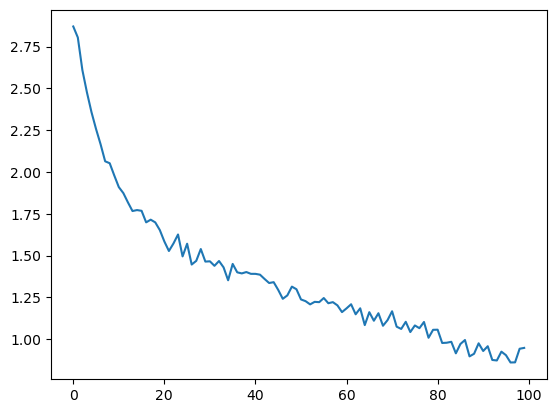

In [44]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)

/var/folders/j2/z3bgs73s7_d7h21sw46sk_4c0000gn/T/ipykernel_86675/3585656379.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + all_categories, rotation=90)
/var/folders/j2/z3bgs73s7_d7h21sw46sk_4c0000gn/T/ipykernel_86675/3585656379.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + all_categories)


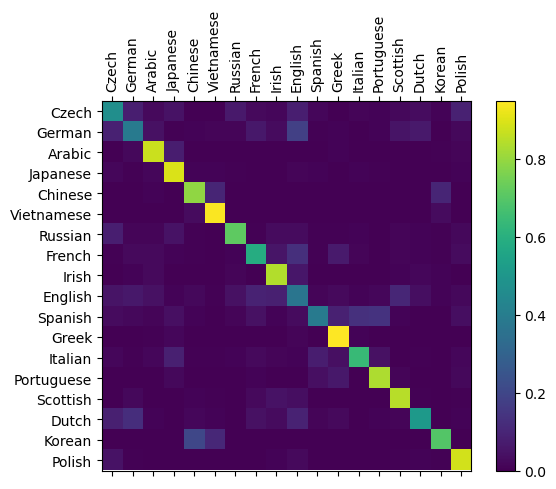

In [45]:
# Keep track of correct guesses in a confusion matrix
confusion = torch.zeros(n_categories, n_categories)
n_confusion = 10000

# Just return an output given a line
def evaluate(line_tensor):
    hidden = rnn.initHidden()

    for i in range(line_tensor.size()[0]):
        output, hidden = rnn(line_tensor[i], hidden)

    return output

# Go through a bunch of examples and record which are correctly guessed
for i in range(n_confusion):
    category, line, category_tensor, line_tensor = randomTrainingExample()
    output = evaluate(line_tensor)
    guess, guess_i = categoryFromOutput(output)
    category_i = all_categories.index(category)
    confusion[category_i][guess_i] += 1

# Normalize by dividing every row by its sum
for i in range(n_categories):
    confusion[i] = confusion[i] / confusion[i].sum()

# Set up plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.numpy())
fig.colorbar(cax)

# Set up axes
ax.set_xticklabels([''] + all_categories, rotation=90)
ax.set_yticklabels([''] + all_categories)

# Force label at every tick
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

# sphinx_gallery_thumbnail_number = 2
plt.show()

In [46]:
def predict(input_line, n_predictions=3):
    print('\n> %s' % input_line)
    with torch.no_grad():
        output = evaluate(lineToTensor(input_line))

        # Get top N categories
        topv, topi = output.topk(n_predictions, 1, True)
        predictions = []

        for i in range(n_predictions):
            value = topv[0][i].item()
            category_index = topi[0][i].item()
            print('(%.2f) %s' % (value, all_categories[category_index]))
            predictions.append([value, all_categories[category_index]])

predict('Dovesky')
predict('Jackson')
predict('Satoshi')


> Dovesky
(-0.43) Russian
(-1.40) English
(-3.05) Czech

> Jackson
(-0.29) Scottish
(-2.21) Russian
(-2.37) English

> Satoshi
(-0.62) Japanese
(-1.93) Polish
(-2.43) Arabic
